In [56]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *
from PIL import Image, ImageTk
from matplotlib.pyplot import figure
pd.set_option("display.max_rows", 20, "display.max_columns", 20)

In [2]:
# https://www.boardgameanalysis.com/the-102-ways-to-win-at-catan-part-i/

In [3]:
# Ways to win
waysToWin = 0
winScenario = []

for longestRoad in range(1 + 1):
    for largestArmy in range(1 + 1):
        for victoryPoint in range(5 + 1):
            for settlement in range(5 + 1):
                for city in range(min(settlement, 4) + 1):
                    for newSettlement in range(city + 1):
                        totalScore = settlement + city + newSettlement + victoryPoint + longestRoad * 2 + largestArmy * 2
                        if (totalScore == 10 or (longestRoad == 1 and totalScore == 11) or (largestArmy == 1 and totalScore == 11)):
                            waysToWin += 1 
# #                             print('ways to win: #', waysToWin, 'score:', totalScore)
# #                             print(
# #                                 'victory point:', victoryPoint,
# #                                 'longest road:', longestRoad*2,
# #                                 'largest army:', largestArmy*2,
# #                                 'settlement:', settlement - city + newSettlement, 
# #                                 'city:', city
# #                             )
                            winScenarioText = str(
                                    longestRoad*10000 
                                    + largestArmy*1000 
                                    + victoryPoint*100 
                                    + (settlement - city + newSettlement)*10 
                                    + city
                                ).zfill(5)
                            winScenario.append(winScenarioText)
# Remove duplicated scenarios                     
winScenario = list(dict.fromkeys(winScenario))
# winScenario

In [4]:
winScenario = pd.DataFrame(winScenario, columns = ['Scenario'])
winScenario

,Scenario
0,00043
1,00024
2,00133
3,00114
4,00152
...,...
112,11420
113,11430
114,11510
115,11501


In [5]:
winScenario['LongestRoad'] = winScenario['Scenario'].astype(str).str[0].astype(int)
winScenario['LargestArmy'] = winScenario['Scenario'].astype(str).str[1].astype(int)
winScenario['VictoryPoint'] = winScenario['Scenario'].astype(str).str[2].astype(int)
winScenario['Settlement'] = winScenario['Scenario'].astype(str).str[3].astype(int)
winScenario['City'] = winScenario['Scenario'].astype(str).str[4].astype(int)
winScenario['TotalScore'] = (
    winScenario['VictoryPoint'] 
    + winScenario['LongestRoad']*2 
    + winScenario['LargestArmy']*2 
    + winScenario['Settlement']
    + winScenario['City']*2
)
winScenario = winScenario[(winScenario['TotalScore'] == 10) | (winScenario['TotalScore'] == 11)]
winScenario

,Scenario,LongestRoad,LargestArmy,VictoryPoint,Settlement,City,TotalScore
0,00043,0,0,0,4,3,10
1,00024,0,0,0,2,4,10
2,00133,0,0,1,3,3,10
3,00114,0,0,1,1,4,10
4,00152,0,0,1,5,2,10
...,...,...,...,...,...,...,...
112,11420,1,1,4,2,0,10
113,11430,1,1,4,3,0,11
114,11510,1,1,5,1,0,10
115,11501,1,1,5,0,1,11


In [6]:
# Checking to see if anything is impossible, such as having less than 2 buildings
winScenario[(winScenario['Settlement'] + winScenario['City']) < 2]

,Scenario,LongestRoad,LargestArmy,VictoryPoint,Settlement,City,TotalScore
110,11401,1,1,4,0,1,10
114,11510,1,1,5,1,0,10
115,11501,1,1,5,0,1,11


In [7]:
# Removing scenario 51101, this is not possible, as at game start we would always have 
winScenario = winScenario[~winScenario['Scenario'].isin(['11401', '11510', '11501'])]
winScenario.shape

(114, 7)

In [8]:
# There is a special scenario, where the player has the 2nd longest road, and places the final 
# settlement to cut off the longest road holder and gain a final settlement and longest road, winning with 12 points
# This can happen when winning longestRoad = False (we don't have longest road yet) and 1 settlement or more
twelvePtsWinScenario = winScenario[(winScenario['LongestRoad'] == 0) & (winScenario['Settlement'] >= 1) & (winScenario['TotalScore'] == 10)]
twelvePtsWinScenario['LongestRoad'] = 1
twelvePtsWinScenario['TotalScore'] = (
    twelvePtsWinScenario['VictoryPoint'] 
    + twelvePtsWinScenario['LongestRoad']*2 
    + twelvePtsWinScenario['LargestArmy']*2 
    + twelvePtsWinScenario['Settlement']
    + twelvePtsWinScenario['City']*2
)
twelvePtsWinScenario['Scenario'] = (
    twelvePtsWinScenario['LongestRoad']*10000 
    + twelvePtsWinScenario['LargestArmy']*1000 
    + twelvePtsWinScenario['VictoryPoint']*100 
    + twelvePtsWinScenario['Settlement']*10 
    + twelvePtsWinScenario['City']
)
twelvePtsWinScenario['Scenario'] = twelvePtsWinScenario['Scenario'].astype(str)
twelvePtsWinScenario

<ipython-input-8-c7eb48333ef6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twelvePtsWinScenario['LongestRoad'] = 1
<ipython-input-8-c7eb48333ef6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twelvePtsWinScenario['TotalScore'] = (
<ipython-input-8-c7eb48333ef6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,Scenario,LongestRoad,LargestArmy,VictoryPoint,Settlement,City,TotalScore
0,10043,1,0,0,4,3,12
1,10024,1,0,0,2,4,12
2,10133,1,0,1,3,3,12
3,10114,1,0,1,1,4,12
4,10152,1,0,1,5,2,12
...,...,...,...,...,...,...,...
40,11350,1,1,3,5,0,12
41,11421,1,1,4,2,1,12
45,11440,1,1,4,4,0,12
47,11511,1,1,5,1,1,12


In [9]:
# There's another impossible scenario, the 1 settlement and 1 city, since the settlement has 
# already been built since the beginning of the game
twelvePtsWinScenario = twelvePtsWinScenario[twelvePtsWinScenario['Scenario'] != '11511']
twelvePtsWinScenario

,Scenario,LongestRoad,LargestArmy,VictoryPoint,Settlement,City,TotalScore
0,10043,1,0,0,4,3,12
1,10024,1,0,0,2,4,12
2,10133,1,0,1,3,3,12
3,10114,1,0,1,1,4,12
4,10152,1,0,1,5,2,12
...,...,...,...,...,...,...,...
37,11331,1,1,3,3,1,12
40,11350,1,1,3,5,0,12
41,11421,1,1,4,2,1,12
45,11440,1,1,4,4,0,12


In [10]:
allWinScenario = winScenario.append(twelvePtsWinScenario)
allWinScenario = allWinScenario.reset_index(drop = True)
allWinScenario.shape

(142, 7)

In [11]:
allWinScenario

,Scenario,LongestRoad,LargestArmy,VictoryPoint,Settlement,City,TotalScore
0,00043,0,0,0,4,3,10
1,00024,0,0,0,2,4,10
2,00133,0,0,1,3,3,10
3,00114,0,0,1,1,4,10
4,00152,0,0,1,5,2,10
...,...,...,...,...,...,...,...
137,11331,1,1,3,3,1,12
138,11350,1,1,3,5,0,12
139,11421,1,1,4,2,1,12
140,11440,1,1,4,4,0,12


In [12]:
allWinScenario['MinDevCard'] = allWinScenario['LargestArmy']*3 + allWinScenario['VictoryPoint']
allWinScenario['NumOfBuilding'] = allWinScenario['Settlement'] + allWinScenario['City']
allWinScenario

,Scenario,LongestRoad,LargestArmy,VictoryPoint,Settlement,City,TotalScore,MinDevCard,NumOfBuilding
0,00043,0,0,0,4,3,10,0,7
1,00024,0,0,0,2,4,10,0,6
2,00133,0,0,1,3,3,10,1,6
3,00114,0,0,1,1,4,10,1,5
4,00152,0,0,1,5,2,10,1,7
...,...,...,...,...,...,...,...,...,...
137,11331,1,1,3,3,1,12,6,4
138,11350,1,1,3,5,0,12,6,5
139,11421,1,1,4,2,1,12,7,3
140,11440,1,1,4,4,0,12,7,4


In [13]:
max(allWinScenario['NumOfBuilding'])

7

In [14]:
allWinScenario[allWinScenario['NumOfBuilding'] == 7]

,Scenario,LongestRoad,LargestArmy,VictoryPoint,Settlement,City,TotalScore,MinDevCard,NumOfBuilding
0,00043,0,0,0,4,3,10,0,7
4,00152,0,0,1,5,2,10,1,7
22,01052,0,1,0,5,2,11,3,7
57,10052,1,0,0,5,2,11,0,7
114,10043,1,0,0,4,3,12,0,7
118,10152,1,0,1,5,2,12,1,7


In [15]:
optimalRoads = pd.DataFrame(
    data = np.array([
        [2, 2, 5], 
        [3, 3, 5], 
        [4, 4, 6],
        [5, 5, 7],
        [6, 6, 8],
        [7, 8, 9]
    ]),
    columns = ['NumOfBuilding', 'Plain', 'LongestRoad']
)
optimalRoads

,NumOfBuilding,Plain,LongestRoad
0,2,2,5
1,3,3,5
2,4,4,6
3,5,5,7
4,6,6,8
5,7,8,9


In [16]:
temp = allWinScenario.merge(optimalRoads, on = 'NumOfBuilding', how = 'left')
temp

,Scenario,LongestRoad_x,LargestArmy,VictoryPoint,Settlement,...,TotalScore,MinDevCard,NumOfBuilding,Plain,LongestRoad_y
0,00043,0,0,0,4,...,10,0,7,8,9
1,00024,0,0,0,2,...,10,0,6,6,8
2,00133,0,0,1,3,...,10,1,6,6,8
3,00114,0,0,1,1,...,10,1,5,5,7
4,00152,0,0,1,5,...,10,1,7,8,9
...,...,...,...,...,...,...,...,...,...,...,...
137,11331,1,1,3,3,...,12,6,4,4,6
138,11350,1,1,3,5,...,12,6,5,5,7
139,11421,1,1,4,2,...,12,7,3,3,5
140,11440,1,1,4,4,...,12,7,4,4,6


In [17]:
temp['OptimalRoad'] = np.where((temp['LongestRoad_x'] == 0), temp['Plain'], temp['LongestRoad_y'])
temp

,Scenario,LongestRoad_x,LargestArmy,VictoryPoint,Settlement,...,MinDevCard,NumOfBuilding,Plain,LongestRoad_y,OptimalRoad
0,00043,0,0,0,4,...,0,7,8,9,8
1,00024,0,0,0,2,...,0,6,6,8,6
2,00133,0,0,1,3,...,1,6,6,8,6
3,00114,0,0,1,1,...,1,5,5,7,5
4,00152,0,0,1,5,...,1,7,8,9,8
...,...,...,...,...,...,...,...,...,...,...,...
137,11331,1,1,3,3,...,6,4,4,6,6
138,11350,1,1,3,5,...,6,5,5,7,7
139,11421,1,1,4,2,...,7,3,3,5,5
140,11440,1,1,4,4,...,7,4,4,6,6


In [36]:
allWinScenario = temp
allWinScenario = allWinScenario.drop(columns = ['Plain', 'LongestRoad_y'])
allWinScenario = allWinScenario.rename(columns = {'LongestRoad_x': 'LongestRoad', 'OptimalRoad': 'MinRoad'})
allWinScenario

,Scenario,LongestRoad,LargestArmy,VictoryPoint,Settlement,City,TotalScore,MinDevCard,NumOfBuilding,MinRoad
0,00043,0,0,0,4,3,10,0,7,8
1,00024,0,0,0,2,4,10,0,6,6
2,00133,0,0,1,3,3,10,1,6,6
3,00114,0,0,1,1,4,10,1,5,5
4,00152,0,0,1,5,2,10,1,7,8
...,...,...,...,...,...,...,...,...,...,...
137,11331,1,1,3,3,1,12,6,4,6
138,11350,1,1,3,5,0,12,6,5,7
139,11421,1,1,4,2,1,12,7,3,5
140,11440,1,1,4,4,0,12,7,4,6


In [48]:
allWinScenario['MinWood'] = allWinScenario['MinRoad'] + allWinScenario['Settlement'] + allWinScenario['City']
allWinScenario['MinBrick'] = allWinScenario['MinRoad'] + allWinScenario['Settlement'] + allWinScenario['City']
allWinScenario['MinSheep'] = allWinScenario['Settlement'] + allWinScenario['MinDevCard'] + allWinScenario['City']
allWinScenario['MinWheat'] = allWinScenario['Settlement'] + allWinScenario['MinDevCard'] + allWinScenario['City']*2 + allWinScenario['City']
allWinScenario['MinRock'] = allWinScenario['MinDevCard'] + allWinScenario['City']*3
allWinScenario['MinTotal'] = allWinScenario['MinWood'] + allWinScenario['MinBrick'] + allWinScenario['MinSheep'] + allWinScenario['MinWheat'] + allWinScenario['MinRock'] 
allWinScenario

,Scenario,LongestRoad,LargestArmy,VictoryPoint,Settlement,City,TotalScore,MinDevCard,NumOfBuilding,MinRoad,MinWood,MinBrick,MinSheep,MinWheat,MinRock,MinTotal
0,00043,0,0,0,4,3,10,0,7,8,15,15,7,13,9,59
1,00024,0,0,0,2,4,10,0,6,6,12,12,6,14,12,56
2,00133,0,0,1,3,3,10,1,6,6,12,12,7,13,10,54
3,00114,0,0,1,1,4,10,1,5,5,10,10,6,14,13,53
4,00152,0,0,1,5,2,10,1,7,8,15,15,8,12,7,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,11331,1,1,3,3,1,12,6,4,6,10,10,10,12,9,51
138,11350,1,1,3,5,0,12,6,5,7,12,12,11,11,6,52
139,11421,1,1,4,2,1,12,7,3,5,8,8,10,12,10,48
140,11440,1,1,4,4,0,12,7,4,6,10,10,11,11,7,49


In [70]:
allWinScenario = allWinScenario.sort_values('MinTotal')
allWinScenario

,Scenario,LongestRoad,LargestArmy,VictoryPoint,Settlement,City,TotalScore,MinDevCard,NumOfBuilding,MinRoad,MinWood,MinBrick,MinSheep,MinWheat,MinRock,MinTotal
85,10530,1,0,5,3,0,10,5,3,5,8,8,8,8,5,37
82,10511,1,0,5,1,1,10,5,2,5,7,7,7,9,8,38
76,10421,1,0,4,2,1,10,4,3,5,8,8,7,9,7,39
111,11420,1,1,4,2,0,10,7,2,5,7,7,9,9,7,39
77,10402,1,0,4,0,2,10,4,2,5,7,7,6,10,10,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,00043,0,0,0,4,3,10,0,7,8,15,15,7,13,9,59
18,01033,0,1,0,3,3,11,3,6,6,12,12,9,15,12,60
115,10024,1,0,0,2,4,12,0,6,8,14,14,6,14,12,60
114,10043,1,0,0,4,3,12,0,7,9,16,16,7,13,9,61


<BarContainer object of 142 artists>

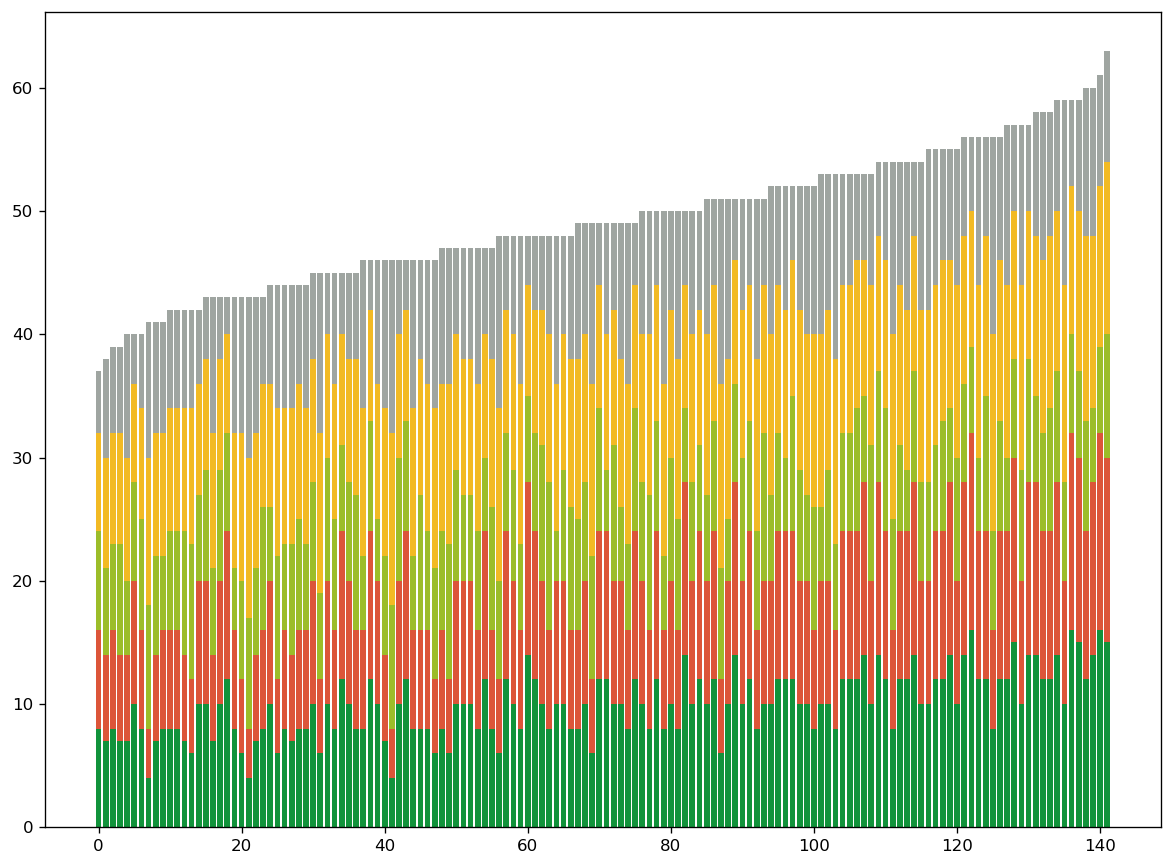

In [71]:
figure(num=None, figsize=(12, 9), dpi=120, facecolor='w', edgecolor='k')
plt.bar(np.arange(142), allWinScenario['MinWood'], color = '#11933B')
plt.bar(np.arange(142), allWinScenario['MinBrick'], color = '#DC5539', bottom = allWinScenario['MinWood'])
plt.bar(np.arange(142), allWinScenario['MinSheep'], color = '#9CBD29', bottom = allWinScenario['MinWood'] + allWinScenario['MinBrick'])
plt.bar(np.arange(142), allWinScenario['MinWheat'], color = '#F2BA24', bottom = allWinScenario['MinWood'] + allWinScenario['MinBrick'] + allWinScenario['MinSheep'])
plt.bar(np.arange(142), allWinScenario['MinRock'], color = '#9FA5A1', bottom = allWinScenario['MinWood'] + allWinScenario['MinBrick'] + allWinScenario['MinSheep'] + allWinScenario['MinWheat'])